<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Interactive Neural Networks

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## Tensors & Tensor Operations

In [1]:
import math
import numpy as np
import pandas as pd
from pylab import plt, mpl
np.random.seed(1)
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(suppress=True)

In [2]:
t0 = np.array(10)
t0

array(10)

In [3]:
t1 = np.array((2, 1))
t1

array([2, 1])

In [4]:
t2 = np.arange(10).reshape(5, 2)
t2

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [5]:
t3 = np.arange(16).reshape(2, 4, 2)
t3

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]]])

In [6]:
t2 + 1

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [7]:
t2 + t2

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [8]:
t1

array([2, 1])

In [9]:
t2

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [10]:
np.dot(t2, t1)

array([ 1,  7, 13, 19, 25])

In [11]:
t2[:, 0] * 2 + t2[:, 1] * 1

array([ 1,  7, 13, 19, 25])

In [12]:
np.dot(t1, t2.T)

array([ 1,  7, 13, 19, 25])

## Simple Neural Network

### Estimation

In [13]:
features = 3

In [14]:
samples = 5

In [15]:
l0 = np.random.random((samples, features))
l0

array([[0.417022  , 0.72032449, 0.00011437],
       [0.30233257, 0.14675589, 0.09233859],
       [0.18626021, 0.34556073, 0.39676747],
       [0.53881673, 0.41919451, 0.6852195 ],
       [0.20445225, 0.87811744, 0.02738759]])

In [16]:
w = np.random.random((features, 1))
w

array([[0.67046751],
       [0.4173048 ],
       [0.55868983]])

In [17]:
l2 = np.dot(l0, w)
l2

array([[0.58025848],
       [0.31553474],
       [0.49075552],
       [0.91901616],
       [0.51882238]])

In [18]:
y = l0[:, 0] * 0.5 + l0[:, 1] 
y = y.reshape(-1, 1)
y

array([[0.9288355 ],
       [0.29792218],
       [0.43869083],
       [0.68860288],
       [0.98034356]])

In [19]:
e = l2 - y
e

array([[-0.34857702],
       [ 0.01761256],
       [ 0.05206469],
       [ 0.23041328],
       [-0.46152118]])

In [20]:
mse = (e ** 2).mean()
mse

0.07812379019517124

In [21]:
d = e * 1
d

array([[-0.34857702],
       [ 0.01761256],
       [ 0.05206469],
       [ 0.23041328],
       [-0.46152118]])

In [22]:
a = 0.01

In [23]:
u = a * np.dot(l0.T, d)
u

array([[-0.0010055 ],
       [-0.00539194],
       [ 0.00167488]])

In [24]:
w

array([[0.67046751],
       [0.4173048 ],
       [0.55868983]])

In [25]:
w -= u

In [26]:
w

array([[0.67147301],
       [0.42269674],
       [0.55701495]])

In [27]:
l2 = np.dot(l0, w)

In [28]:
e = l2 - y

In [29]:
mse = (e ** 2).mean()
mse

0.07681782193617316

In [30]:
a = 0.025

In [31]:
w = np.random.random((features, 1))
w

array([[0.14038694],
       [0.19810149],
       [0.80074457]])

In [32]:
steps = 800

In [33]:
for s in range(1, steps + 1):
    l2 = np.dot(l0, w)
    e = l2 - y
    u = a * np.dot(l0.T, e)
    w -= u
    mse = (e ** 2).mean()
    if s % 50 == 0: 
        print(f'step={s:3d} | mse={mse:.5f}')

step= 50 | mse=0.03064
step=100 | mse=0.01002
step=150 | mse=0.00390
step=200 | mse=0.00195
step=250 | mse=0.00124
step=300 | mse=0.00092
step=350 | mse=0.00074
step=400 | mse=0.00060
step=450 | mse=0.00050
step=500 | mse=0.00041
step=550 | mse=0.00035
step=600 | mse=0.00029
step=650 | mse=0.00024
step=700 | mse=0.00020
step=750 | mse=0.00017
step=800 | mse=0.00014


In [34]:
l2 - y

array([[-0.01240168],
       [-0.01606065],
       [ 0.01274072],
       [-0.00087794],
       [ 0.01072845]])

In [35]:
w

array([[0.41907514],
       [1.02965827],
       [0.04421136]])

### Classification

In [36]:
def sigmoid(x, deriv=False):
    if deriv:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))

In [37]:
x = np.linspace(-10, 10, 100)

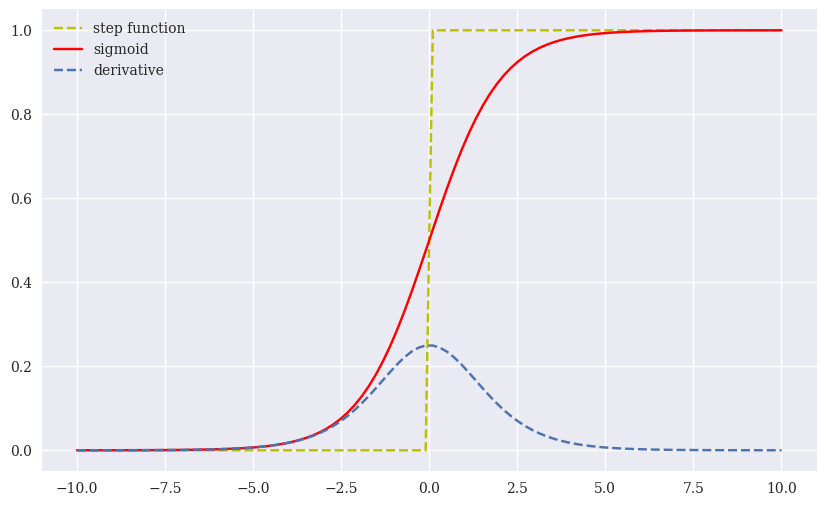

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(x, np.where(x > 0, 1, 0), 'y--', label='step function')
plt.plot(x, sigmoid(x), 'r', label='sigmoid')
plt.plot(x, sigmoid(x, True), '--', label='derivative')
plt.legend();

In [39]:
features = 4
samples = 5

In [40]:
l0 = np.random.randint(0, 2, (samples, features))
l0

array([[1, 1, 1, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       [1, 1, 1, 0],
       [1, 0, 0, 1]])

In [41]:
w = np.random.random((features, 1))
w

array([[0.42110763],
       [0.95788953],
       [0.53316528],
       [0.69187711]])

In [42]:
np.dot(l0, w)

array([[2.60403955],
       [1.49105482],
       [0.95788953],
       [1.91216244],
       [1.11298474]])

In [43]:
l2 = sigmoid(np.dot(l0, w))
l2

array([[0.93112111],
       [0.81623654],
       [0.72269905],
       [0.87126189],
       [0.75268514]])

In [44]:
l2.round()

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [45]:
y = np.random.randint(0, 2, samples)
y = y.reshape(-1, 1)
y

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [46]:
e = l2 - y 
e

array([[-0.06887889],
       [-0.18376346],
       [ 0.72269905],
       [ 0.87126189],
       [ 0.75268514]])

In [47]:
mse = (e ** 2).mean()
mse

0.37728788783411127

In [48]:
a = 0.02

In [49]:
d = e * sigmoid(l2, True)
d

array([[-0.01396723],
       [-0.03906484],
       [ 0.15899479],
       [ 0.18119776],
       [ 0.16384833]])

In [50]:
u = a * np.dot(l0.T, d)
u

array([[0.00662158],
       [0.00574321],
       [0.00256331],
       [0.00299762]])

In [51]:
w

array([[0.42110763],
       [0.95788953],
       [0.53316528],
       [0.69187711]])

In [52]:
w -= u

In [53]:
w

array([[0.41448605],
       [0.95214632],
       [0.53060197],
       [0.68887949]])

In [54]:
steps = 3001

In [55]:
a = 0.025

In [56]:
w = np.random.random((features, 1))
w

array([[0.41253884],
       [0.03417131],
       [0.62402999],
       [0.66063573]])

In [57]:
for s in range(1, steps + 1):
    l2 = sigmoid(np.dot(l0, w))
    e = l2 - y
    d = e * sigmoid(l2, True)
    u = a * np.dot(l0.T, d)
    w -= u
    mse = (e ** 2).mean()
    if s % 200 == 0:
        print(f'step={s:4d} | mse={mse:.4f}')

step= 200 | mse=0.1899
step= 400 | mse=0.1572
step= 600 | mse=0.1349
step= 800 | mse=0.1173
step=1000 | mse=0.1029
step=1200 | mse=0.0908
step=1400 | mse=0.0806
step=1600 | mse=0.0720
step=1800 | mse=0.0646
step=2000 | mse=0.0583
step=2200 | mse=0.0529
step=2400 | mse=0.0482
step=2600 | mse=0.0441
step=2800 | mse=0.0405
step=3000 | mse=0.0373


In [58]:
l2

array([[0.71220474],
       [0.92308745],
       [0.16614971],
       [0.20193503],
       [0.17094583]])

In [59]:
l2.round()

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [60]:
l2.round() == y

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
w

array([[-3.86002022],
       [-1.61346536],
       [ 4.09895004],
       [ 2.28088807]])

## Learning &mdash; One Hidden Layer

### Estimation

In [62]:
features = 5
samples = 5

In [63]:
l0 = np.random.random((samples, features))
l0

array([[0.29849529, 0.44613451, 0.22212455, 0.07336417, 0.46923853],
       [0.09617226, 0.90337017, 0.11949047, 0.52479938, 0.083623  ],
       [0.91686133, 0.91044838, 0.29893011, 0.58438912, 0.56591203],
       [0.61393832, 0.95653566, 0.26097898, 0.23101542, 0.53344849],
       [0.94993814, 0.49305959, 0.54060051, 0.7654851 , 0.04534573]])

In [64]:
np.linalg.matrix_rank(l0)

5

In [65]:
units = 3

In [66]:
w0 = np.random.random((features, units))
w0

array([[0.13996612, 0.79240359, 0.02980136],
       [0.88312548, 0.54078819, 0.44798018],
       [0.89213587, 0.37758434, 0.53842469],
       [0.65229888, 0.36126102, 0.57100856],
       [0.63783648, 0.12631489, 0.69020459]])

In [67]:
l1 = np.dot(l0, w0)
l1

array([[0.98109007, 0.64743919, 0.69411448],
       [1.31351565, 0.81000928, 0.82927653],
       [1.94121167, 1.61435539, 1.32042417],
       [1.65444429, 1.25315104, 1.08742312],
       [1.57892999, 1.50576525, 1.00865941]])

In [68]:
w1 = np.random.random((units, 1))
w1

array([[0.6477494 ],
       [0.35393909],
       [0.76323305]])

In [69]:
l2 = np.dot(l1, w1)
l2

array([[1.39442565],
       [1.77045418],
       [2.83659354],
       [2.3451617 ],
       [2.32554234]])

In [70]:
y = np.random.random((samples, 1))
y

array([[0.35653172],
       [0.75278835],
       [0.88134183],
       [0.01166919],
       [0.49810907]])

In [71]:
e2 = l2 - y
e2

array([[1.03789393],
       [1.01766583],
       [1.95525171],
       [2.33349251],
       [1.82743327]])

In [72]:
mse = (e2 ** 2).mean()
mse

2.944115281365501

In [73]:
d2 = e2 * 1
d2

array([[1.03789393],
       [1.01766583],
       [1.95525171],
       [2.33349251],
       [1.82743327]])

In [74]:
a = 0.05

In [75]:
u2 = a * np.dot(l1.T, d2)
u2

array([[0.64482837],
       [0.51643336],
       [0.42634283]])

In [76]:
w1

array([[0.6477494 ],
       [0.35393909],
       [0.76323305]])

In [77]:
w1 -= u2

In [78]:
w1

array([[ 0.00292103],
       [-0.16249427],
       [ 0.33689022]])

In [79]:
e1 = np.dot(d2, w1.T)

In [80]:
d1 = e1 * 1

In [81]:
u1 = a * np.dot(l0.T, d1)

In [82]:
w0 -= u1

In [83]:
w0

array([[ 0.13918198,  0.8360247 , -0.06063583],
       [ 0.88220599,  0.59193836,  0.34193342],
       [ 0.89176585,  0.39816855,  0.49574861],
       [ 0.65175984,  0.39124762,  0.50883904],
       [ 0.63739741,  0.15074009,  0.63956519]])

In [84]:
a = 0.015
steps = 5000

In [85]:
for s in range(1, steps + 1):
    l1 = np.dot(l0, w0)
    l2 = np.dot(l1, w1)
    e2 = l2 - y
    u2 = a * np.dot(l1.T, e2)
    w1 -= u2
    e1 = np.dot(e2, w1.T)
    u1 = a * np.dot(l0.T, e1)
    w0 -= u1
    mse = (e2 ** 2).mean()
    if s % 750 == 0: 
        print(f'step={s:5d} | mse={mse:.6f}')

step=  750 | mse=0.039263
step= 1500 | mse=0.009867
step= 2250 | mse=0.000666
step= 3000 | mse=0.000027
step= 3750 | mse=0.000001
step= 4500 | mse=0.000000


In [86]:
l2

array([[0.35634333],
       [0.75275415],
       [0.88135507],
       [0.01179945],
       [0.49809208]])

In [87]:
y

array([[0.35653172],
       [0.75278835],
       [0.88134183],
       [0.01166919],
       [0.49810907]])

In [88]:
(l2 - y)

array([[-0.00018839],
       [-0.00003421],
       [ 0.00001324],
       [ 0.00013025],
       [-0.00001699]])

### Classification

In [89]:
features = 5
samples = 10
units = 10

In [90]:
np.random.seed(200)
l0 = np.random.randint(0, 2, (samples, features))
w0 = np.random.random((features, units))
w1 = np.random.random((units, 1))
y = np.random.randint(0, 2, (samples, 1))

In [91]:
l0

array([[0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]])

In [92]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [93]:
a = 0.1
steps = 20000

In [94]:
for s in range(1, steps + 1):
    l1 = sigmoid(np.dot(l0, w0))
    l2 = sigmoid(np.dot(l1, w1))
    e2 = l2 - y
    d2 = e2 * sigmoid(l2, True)
    u2 = a * np.dot(l1.T, d2)
    w1 -= u2
    e1 = np.dot(d2, w1.T)
    d1 = e1 * sigmoid(l1, True)
    u1 = a * np.dot(l0.T, d1)
    w0 -= u1
    mse = (e2 ** 2).mean()
    if s % 2000 == 0: 
        print(f'step={s:5d} | mse={mse:.5f}')

step= 2000 | mse=0.00933
step= 4000 | mse=0.02399
step= 6000 | mse=0.05134
step= 8000 | mse=0.00064
step=10000 | mse=0.00013
step=12000 | mse=0.00009
step=14000 | mse=0.00007
step=16000 | mse=0.00007
step=18000 | mse=0.00012
step=20000 | mse=0.00015


In [95]:
l2.round()

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [96]:
acc = l2.round() == y
acc

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [97]:
sum(acc) / len(acc)

array([1.])

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">